# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

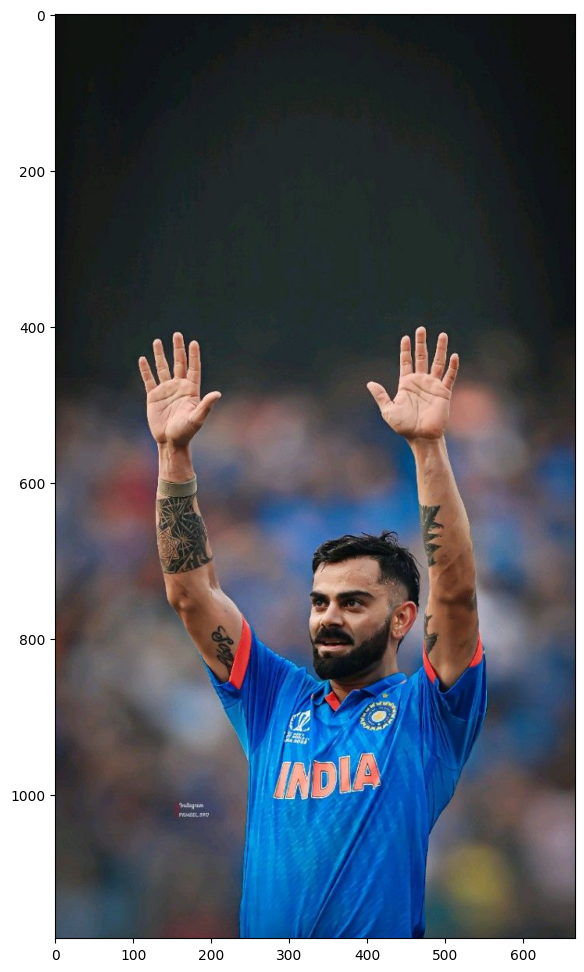

In [1]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

import cv2
import numpy as np
import matplotlib.pyplot as plt
img_bgr = cv2.imread("Virat.jpg")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) #converting BGR to RGB
plt.figure(figsize = (12,12))
plt.imshow(img_rgb)
plt.show()

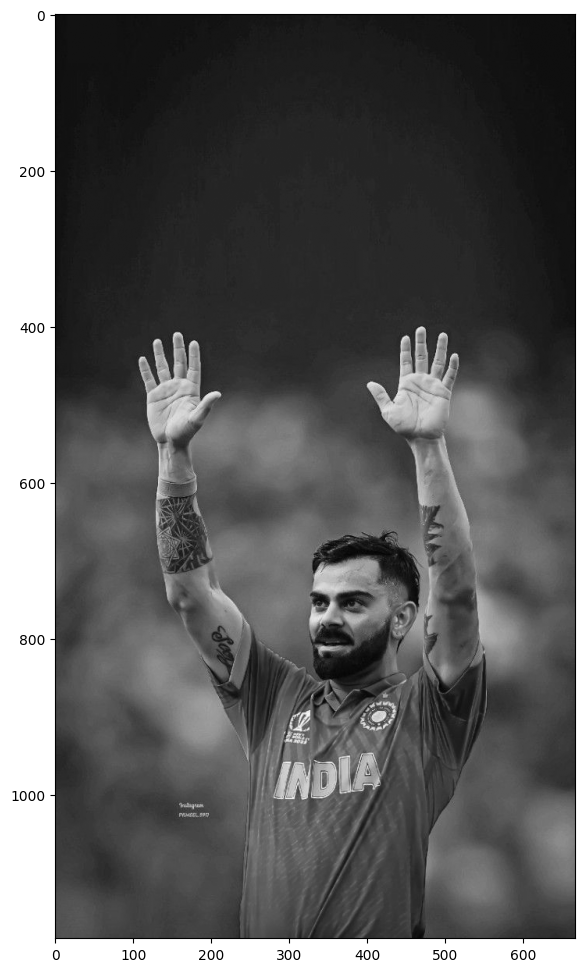

In [2]:
R = img_rgb[:,:,0]
G = img_rgb[:,:,1]
B = img_rgb[:,:,2]

gray_manual = 0.299*R + 0.587*G + 0.114*B
gray_manual = gray_manual.astype(np.uint8)
plt.figure(figsize = (12,12))
plt.imshow(gray_manual, cmap = 'gray')


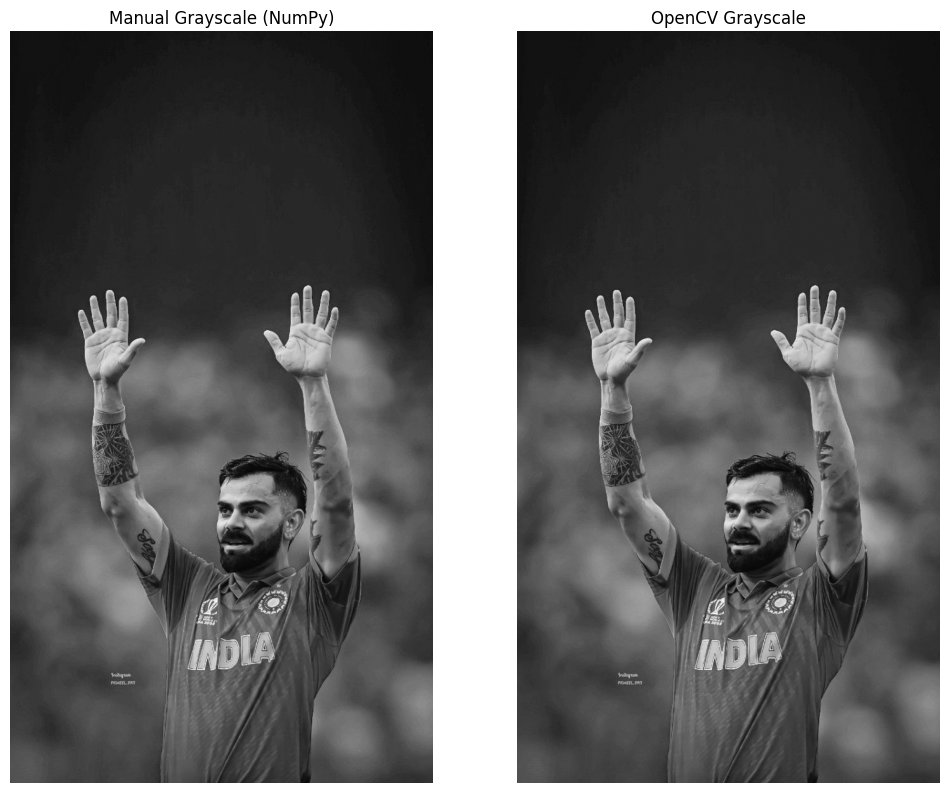

In [3]:
gray_cv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(12,12))

plt.subplot(1,2,1)
plt.imshow(gray_manual, cmap="gray")
plt.title("Manual Grayscale (NumPy)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(gray_cv, cmap="gray")
plt.title("OpenCV Grayscale")
plt.axis("off")

plt.show()

In [4]:
print("RGB image shape:", img_rgb.shape)
print("Manual Gray shape:", gray_manual.shape)
print("OpenCV Gray shape:", gray_cv.shape)

RGB image shape: (1184, 666, 3)
Manual Gray shape: (1184, 666)
OpenCV Gray shape: (1184, 666)


In [5]:
print(img_rgb[6, 10], img_rgb[40,58])
print(gray_cv[110, 20], gray_cv[60,73])
print(gray_manual[110,20], gray_manual[60,73])

[13 17 16] [15 20 16]
18 18
18 18


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [6]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.


import cv2
import numpy as np
import matplotlib.pyplot as plt
img_bgr = cv2.imread("Virat.jpg")
gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
f = np.fft.fft2(gray)
fshift = np.fft.fftshift(f)
print("gray shape:", gray.shape, " dtype:", gray.dtype)
print("f (FFT) shape:", f.shape, " dtype:", f.dtype)
print("fshift shape:", fshift.shape, " dtype:", fshift.dtype)
gray_float = gray_cv.astype(np.float32) #converting to float for maths

f = np.fft.fft2(gray_float) #FFT
fshift  = np.fft.fftshift(f) #shifting low frequencies to centre
print(fshift)

gray shape: (1184, 666)  dtype: uint8
f (FFT) shape: (1184, 666)  dtype: complex128
fshift shape: (1184, 666)  dtype: complex128
[[ -386.      +1.70530257e-13j  1303.356   +3.18042114e+02j
  -1062.9913  +6.54552002e+02j ...   463.9474  +8.56004578e+02j
  -1062.9913  -6.54552002e+02j  1303.356   -3.18042114e+02j]
 [ -602.98956 -6.05487732e+02j   695.8645  +5.69507141e+02j
   -633.13    -6.29224243e+02j ...     2.089335+8.29877686e+02j
   1145.7614  -1.31488599e+03j  -594.68463 +1.38915491e+03j]
 [ 1018.3141  -1.49687363e+02j -1500.6221  +3.58646729e+02j
    618.547   -1.03697485e+03j ... -1598.1003  -7.29077332e+02j
    821.551   +1.02928625e+03j  -204.81766 -4.75681162e+00j]
 ...
 [ -804.0046  -5.94961853e+02j   219.41164 +1.04685486e+03j
   -512.1338  -1.25193018e+03j ...   -46.601208-1.13224335e+02j
   1190.3768  -1.63740991e+03j   354.4529  +1.37645007e+03j]
 [ 1018.3141  +1.49687363e+02j  -204.81766 +4.75681162e+00j
    821.551   -1.02928625e+03j ...    67.12367 -1.17906212e+02j
  

<Axes: >

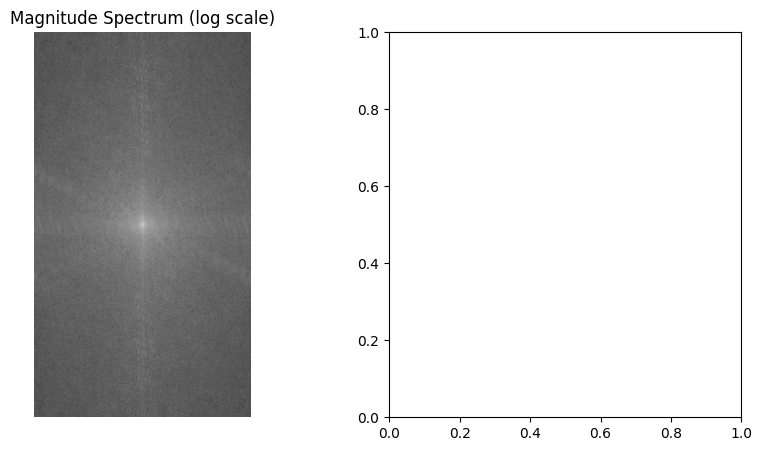

In [7]:
magnitude = np.abs(fshift)
phase = np.angle(fshift)
magnitude_log = np.log1p(magnitude)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(magnitude_log, cmap="gray")
plt.title("Magnitude Spectrum (log scale)")
plt.axis("off")

plt.subplot(1,2,2)

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

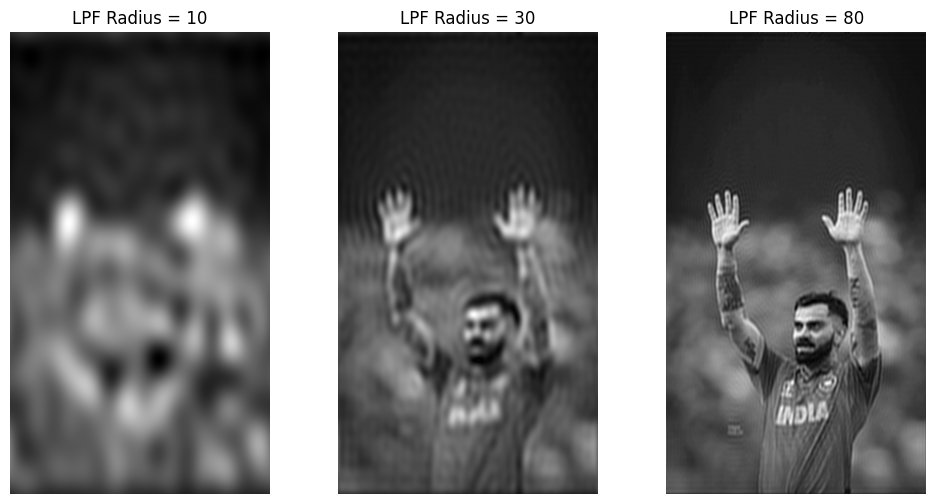

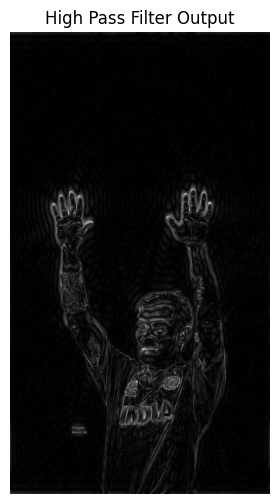

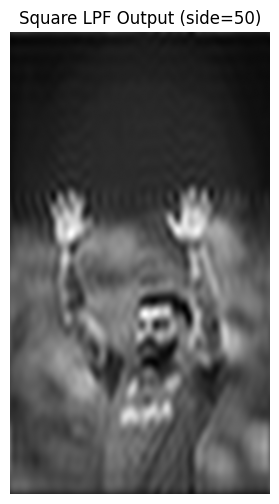

In [8]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.
import cv2
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Load → Grayscale → FFT → Shift
# -----------------------------
img = cv2.imread("Virat.jpg", cv2.IMREAD_GRAYSCALE)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

rows, cols = img.shape
cx, cy = rows//2, cols//2   # center of frequency domain

# =========================================
# C1. THREE LOW PASS FILTERS (LPF)
# Radii: 10, 30, 80
# =========================================

radii = [10, 30, 80]
blur_outputs = []

for r in radii:

    # Create a circular LPF mask
    mask = np.zeros((rows, cols), dtype=np.uint8)

    # Keep only frequencies inside radius r
    for i in range(rows):
        for j in range(cols):
            if (i - cx)**2 + (j - cy)**2 <= r*r:
                mask[i, j] = 1

    # Apply mask
    f_low = fshift * mask

    # Reconstruct image
    ishift = np.fft.ifftshift(f_low)
    recon = np.fft.ifft2(ishift)
    recon = np.abs(recon)

    blur_outputs.append((r, recon))

# Display result for LPF
plt.figure(figsize=(12,6))

for idx, (r, result) in enumerate(blur_outputs):
    plt.subplot(1, 3, idx+1)
    plt.imshow(result, cmap='gray')
    plt.title(f"LPF Radius = {r}")
    plt.axis("off")

plt.show()

"""
WHY DOES BLUR INCREASE AS RADIUS DECREASES?
→ Small radius keeps only very low frequencies (smooth areas)
→ High-frequency edges are removed
→ Therefore, smaller radius = more blur
"""


# =========================================
# C2. HIGH PASS FILTER (HPF)
# =========================================

# Create a circular HPF with radius 30 (you may change)
r = 30
mask_hpf = np.ones((rows, cols), dtype=np.uint8)

# Zero out low frequencies in center
for i in range(rows):
    for j in range(cols):
        if (i - cx)**2 + (j - cy)**2 <= r*r:
            mask_hpf[i, j] = 0

# Apply HPF
f_high = fshift * mask_hpf

# Reconstruct
ishift_h = np.fft.ifftshift(f_high)
hpf_img = np.abs(np.fft.ifft2(ishift_h))

plt.figure(figsize=(5,6))
plt.imshow(hpf_img, cmap='gray')
plt.title("High Pass Filter Output")
plt.axis("off")
plt.show()


# =========================================
# C3. SQUARE LPF MASK (side = 50)
# =========================================

side = 50
half = side//2

mask_square = np.zeros((rows, cols), dtype=np.uint8)

# Create a square centered at (cx, cy)
mask_square[cx-half:cx+half, cy-half:cy+half] = 1

# Apply
f_sq = fshift * mask_square

# Reconstruct
ishift_sq = np.fft.ifftshift(f_sq)
square_lpf_img = np.abs(np.fft.ifft2(ishift_sq))

plt.figure(figsize=(6,6))
plt.imshow(square_lpf_img, cmap='gray')
plt.title("Square LPF Output (side=50)")
plt.axis("off")
plt.show()


## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

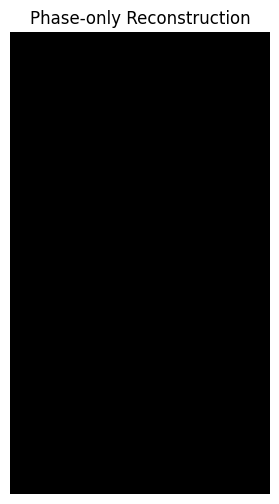

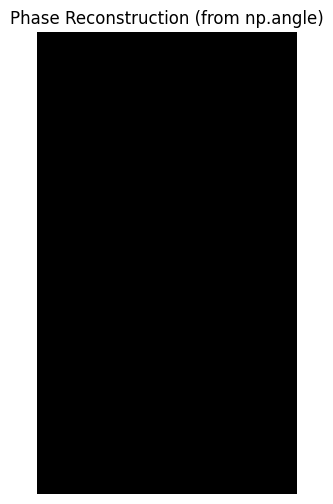

In [9]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

mag = np.abs(fshift)

phase_only = fshift / mag

# Inverse shift + inverse FFT
phase_only_ishift = np.fft.ifftshift(phase_only)
img_phase_only_complex = np.fft.ifft2(phase_only_ishift)
img_phase_only = np.abs(img_phase_only_complex)

# Normalize to 0–255 for display
img_phase_only = np.clip(img_phase_only, 0, 255).astype(np.uint8)

plt.figure(figsize=(6, 6))
plt.imshow(img_phase_only, cmap="gray")
plt.title("Phase-only Reconstruction")
plt.axis("off")
plt.show()

#using np.angle(fshift)
# This alone is just angles, not a valid spectrum
phase = np.angle(fshift)
phase_ishift = np.fft.ifftshift(phase)
img_phase_from_angle = np.fft.ifft2(phase_ishift)
img_phase_from_angle = np.abs(img_phase_from_angle)
img_phase_from_angle = np.clip(img_phase_from_angle, 0, 255).astype(np.uint8)

plt.figure(figsize=(6, 6))
plt.imshow(img_phase_from_angle, cmap="gray")
plt.title("Phase Reconstruction (from np.angle)")
plt.axis("off")
plt.show()


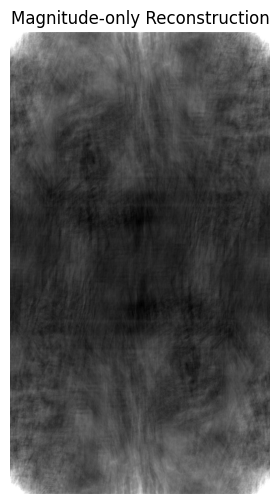

In [10]:
mag_only = np.abs(fshift)

# Make it complex with zero phase (imag part = 0)
mag_only_complex = mag_only.astype(np.complex64)

mag_ishift = np.fft.ifftshift(mag_only_complex)
img_mag_only_complex = np.fft.ifft2(mag_ishift)
img_mag_only = np.abs(img_mag_only_complex)

# Normalize/clip to 0–255
img_mag_only = np.clip(img_mag_only, 0, 255).astype(np.uint8)

plt.figure(figsize=(6, 6))
plt.imshow(img_mag_only, cmap="gray")
plt.title("Magnitude-only Reconstruction")
plt.axis("off")
plt.show()

# The image from magnitude-only reconstruction looks very different from the "Magnitude Spectrum".
# The Magnitude Spectrum plot shows |F(u,v)| directly in the FREQUENCY domain, and we take log(|F|+1)
# to compress the huge dynamic range so that we can see both large and small values.
# In magnitude-only reconstruction, we perform an inverse FFT on |F| (with zero phase),
# so we are back in the SPATIAL domain, and we are no longer using the logarithm.
# Therefore the visualization and contrast look completely different.

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

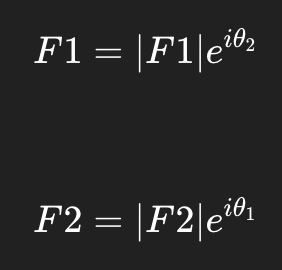

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


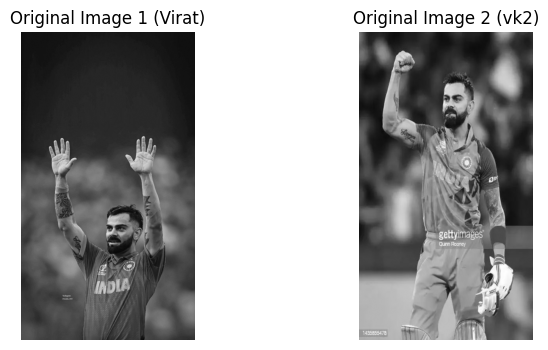

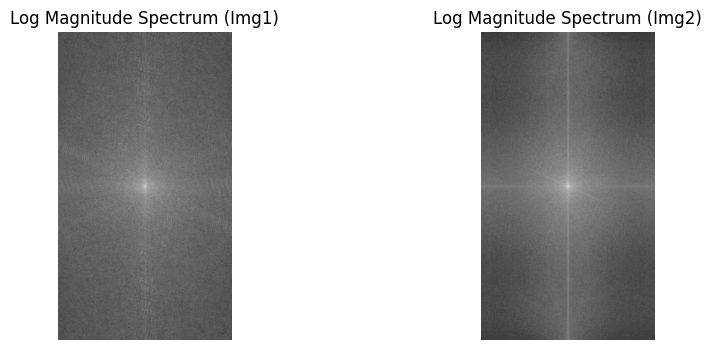

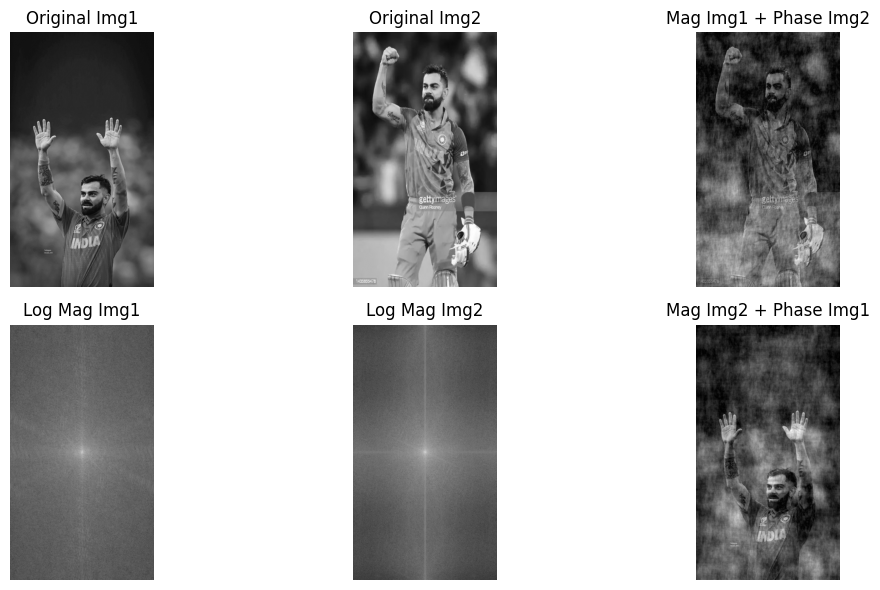

Image shape: (1184, 666)
Sample pixel (img1) [100,100]: 19
Sample pixel (recon1) [100,100]: 40


'\nObservation (put this in your assignment):\n- The reconstructed image that uses the phase of an original tends to preserve the *structure* (edges,\n  object outlines, recognizable layout) of the image whose phase was used.\n- The magnitude contains mostly amplitude/energy information (textures, contrast), but without the phase\n  the image structure becomes unrecognizable or heavily distorted.\n- Therefore: PHASE → encodes structural information (geometry, position of edges).\n             MAGNITUDE → encodes textural / intensity-scale information.\n'

In [11]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

import cv2
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Load images (grayscale) & ensure same size
# ----------------------------
img1 = cv2.imread("Virat.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("vk2.jpg", cv2.IMREAD_GRAYSCALE)


# Resize img2 to img1 size if needed
if img1.shape != img2.shape:
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]), interpolation=cv2.INTER_AREA)

# show originals
plt.figure(figsize=(8,4))
plt.subplot(1,2,1); plt.imshow(img1, cmap='gray'); plt.title("Original Image 1 (Virat)"); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(img2, cmap='gray'); plt.title("Original Image 2 (vk2)"); plt.axis('off')
plt.show()

# ----------------------------
# Compute FFTs (centered)
# ----------------------------
F1 = np.fft.fft2(img1)
F2 = np.fft.fft2(img2)

F1_shift = np.fft.fftshift(F1)
F2_shift = np.fft.fftshift(F2)

# Magnitude and phase
mag1 = np.abs(F1_shift)
phase1 = np.angle(F1_shift)

mag2 = np.abs(F2_shift)
phase2 = np.angle(F2_shift)

# (Optional) visualize log-magnitude spectra for intuition
mag1_log = np.log1p(mag1)
mag2_log = np.log1p(mag2)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(mag1_log, cmap='gray'); plt.title("Log Magnitude Spectrum (Img1)"); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(mag2_log, cmap='gray'); plt.title("Log Magnitude Spectrum (Img2)"); plt.axis('off')
plt.show()

# ----------------------------
# Swap: combine magnitude of one with phase of the other
# Construct complex spectrum: mag * exp(i * phase)
# ----------------------------
# Mag1 + Phase2
S1 = mag1 * np.exp(1j * phase2)

# Mag2 + Phase1
S2 = mag2 * np.exp(1j * phase1)

# Undo fftshift then inverse FFT to reconstruct spatial images
S1_ishift = np.fft.ifftshift(S1)
S2_ishift = np.fft.ifftshift(S2)

recon1 = np.fft.ifft2(S1_ishift)
recon2 = np.fft.ifft2(S2_ishift)

# Take magnitude (absolute) and normalize to uint8 for display
recon1 = np.abs(recon1)
recon2 = np.abs(recon2)

# Normalize to 0-255 for safe display
def to_uint8(img):
    img = img - img.min()
    if img.max() != 0:
        img = img / img.max()
    img = (img * 255).astype(np.uint8)
    return img

recon1_u8 = to_uint8(recon1)
recon2_u8 = to_uint8(recon2)

# ----------------------------
# Display results
# ----------------------------
plt.figure(figsize=(12,6))

plt.subplot(2,3,1); plt.imshow(img1, cmap='gray'); plt.title("Original Img1"); plt.axis('off')
plt.subplot(2,3,2); plt.imshow(img2, cmap='gray'); plt.title("Original Img2"); plt.axis('off')
plt.subplot(2,3,3); plt.imshow(recon1_u8, cmap='gray'); plt.title("Mag Img1 + Phase Img2"); plt.axis('off')

plt.subplot(2,3,4); plt.imshow(mag1_log, cmap='gray'); plt.title("Log Mag Img1"); plt.axis('off')
plt.subplot(2,3,5); plt.imshow(mag2_log, cmap='gray'); plt.title("Log Mag Img2"); plt.axis('off')
plt.subplot(2,3,6); plt.imshow(recon2_u8, cmap='gray'); plt.title("Mag Img2 + Phase Img1"); plt.axis('off')

plt.tight_layout()
plt.show()

# ----------------------------
# Print shapes and a few sample values
# ----------------------------
print("Image shape:", img1.shape)
print("Sample pixel (img1) [100,100]:", img1[100,100])
print("Sample pixel (recon1) [100,100]:", recon1_u8[100,100])

# ----------------------------
# Assignment comment (explain observation)
# ----------------------------
"""
Observation (put this in your assignment):
- The reconstructed image that uses the phase of an original tends to preserve the *structure* (edges,
  object outlines, recognizable layout) of the image whose phase was used.
- The magnitude contains mostly amplitude/energy information (textures, contrast), but without the phase
  the image structure becomes unrecognizable or heavily distorted.
- Therefore: PHASE → encodes structural information (geometry, position of edges).
             MAGNITUDE → encodes textural / intensity-scale information.
"""
